In [1]:
import taunet_utils
from os.path import join
import pandas as pd
import seaborn as sns
import json

In [7]:
# input_data, output_data = taunet_utils.create_dataset(join("dataset", "audio"), 
#                                                       join("dataset", "human_input", "AITD_Dataset_Kristof_beta_1.csv"),
#                                                       join("..", "src", "af", "AFInC.dll"),
#                                                       join("dataset", "saved", "AITD_Dataset_Kristof_beta_1.json"))

with open(join("dataset", "saved", "AITD_Dataset_Kristof_beta_1in.json"), "r") as json_file:
    input_data = json.load(json_file)
with open(join("dataset", "saved", "AITD_Dataset_Kristof_beta_1out.json"), "r") as json_file:
    output_data = json.load(json_file)

data = {**input_data, **output_data}
df = pd.DataFrame.from_dict(input_data).T
df.index = df.index.astype(int)
df = df.sort_index()
df.columns = ["TEMPO",
              "T1A", 
              "T2A", 
              "CENTROID", 
              "FLATNESS", 
              "L", 
              "ML", 
              "MH", 
              "H", 
              "FLUX",
              "ATTACK_GAIN",
              "SUSTAIN_GAIN",
              "ATTACK_T2",
              "SUSTAIN_T2"]
df.head()

,TEMPO,T1A,T2A,CENTROID,FLATNESS,L,ML,MH,H,FLUX,ATTACK_GAIN,SUSTAIN_GAIN,ATTACK_T2,SUSTAIN_T2
1,123.9669,0.0120,0.2251,15648.0,0.9176,82.0,10.0,5.0,1.0,47.5291,0.6738,0.8758,550.0,350.0
2,153.0612,0.0322,0.1695,10716.0,0.8286,137.0,7.0,3.0,2.0,94.4725,0.7384,0.2437,550.0,350.0
3,171.1027,0.0236,0.3093,6128.0,0.8070,72.0,7.0,5.0,1.0,79.7098,0.2224,0.9991,550.0,350.0
4,181.4516,0.0294,0.3120,7848.0,0.6281,82.0,9.0,5.0,1.0,53.2918,0.6711,0.8347,550.0,350.0
5,108.6957,0.0120,0.2543,14056.0,0.7880,110.0,6.0,3.0,2.0,100.8992,0.6149,0.8181,550.0,350.0


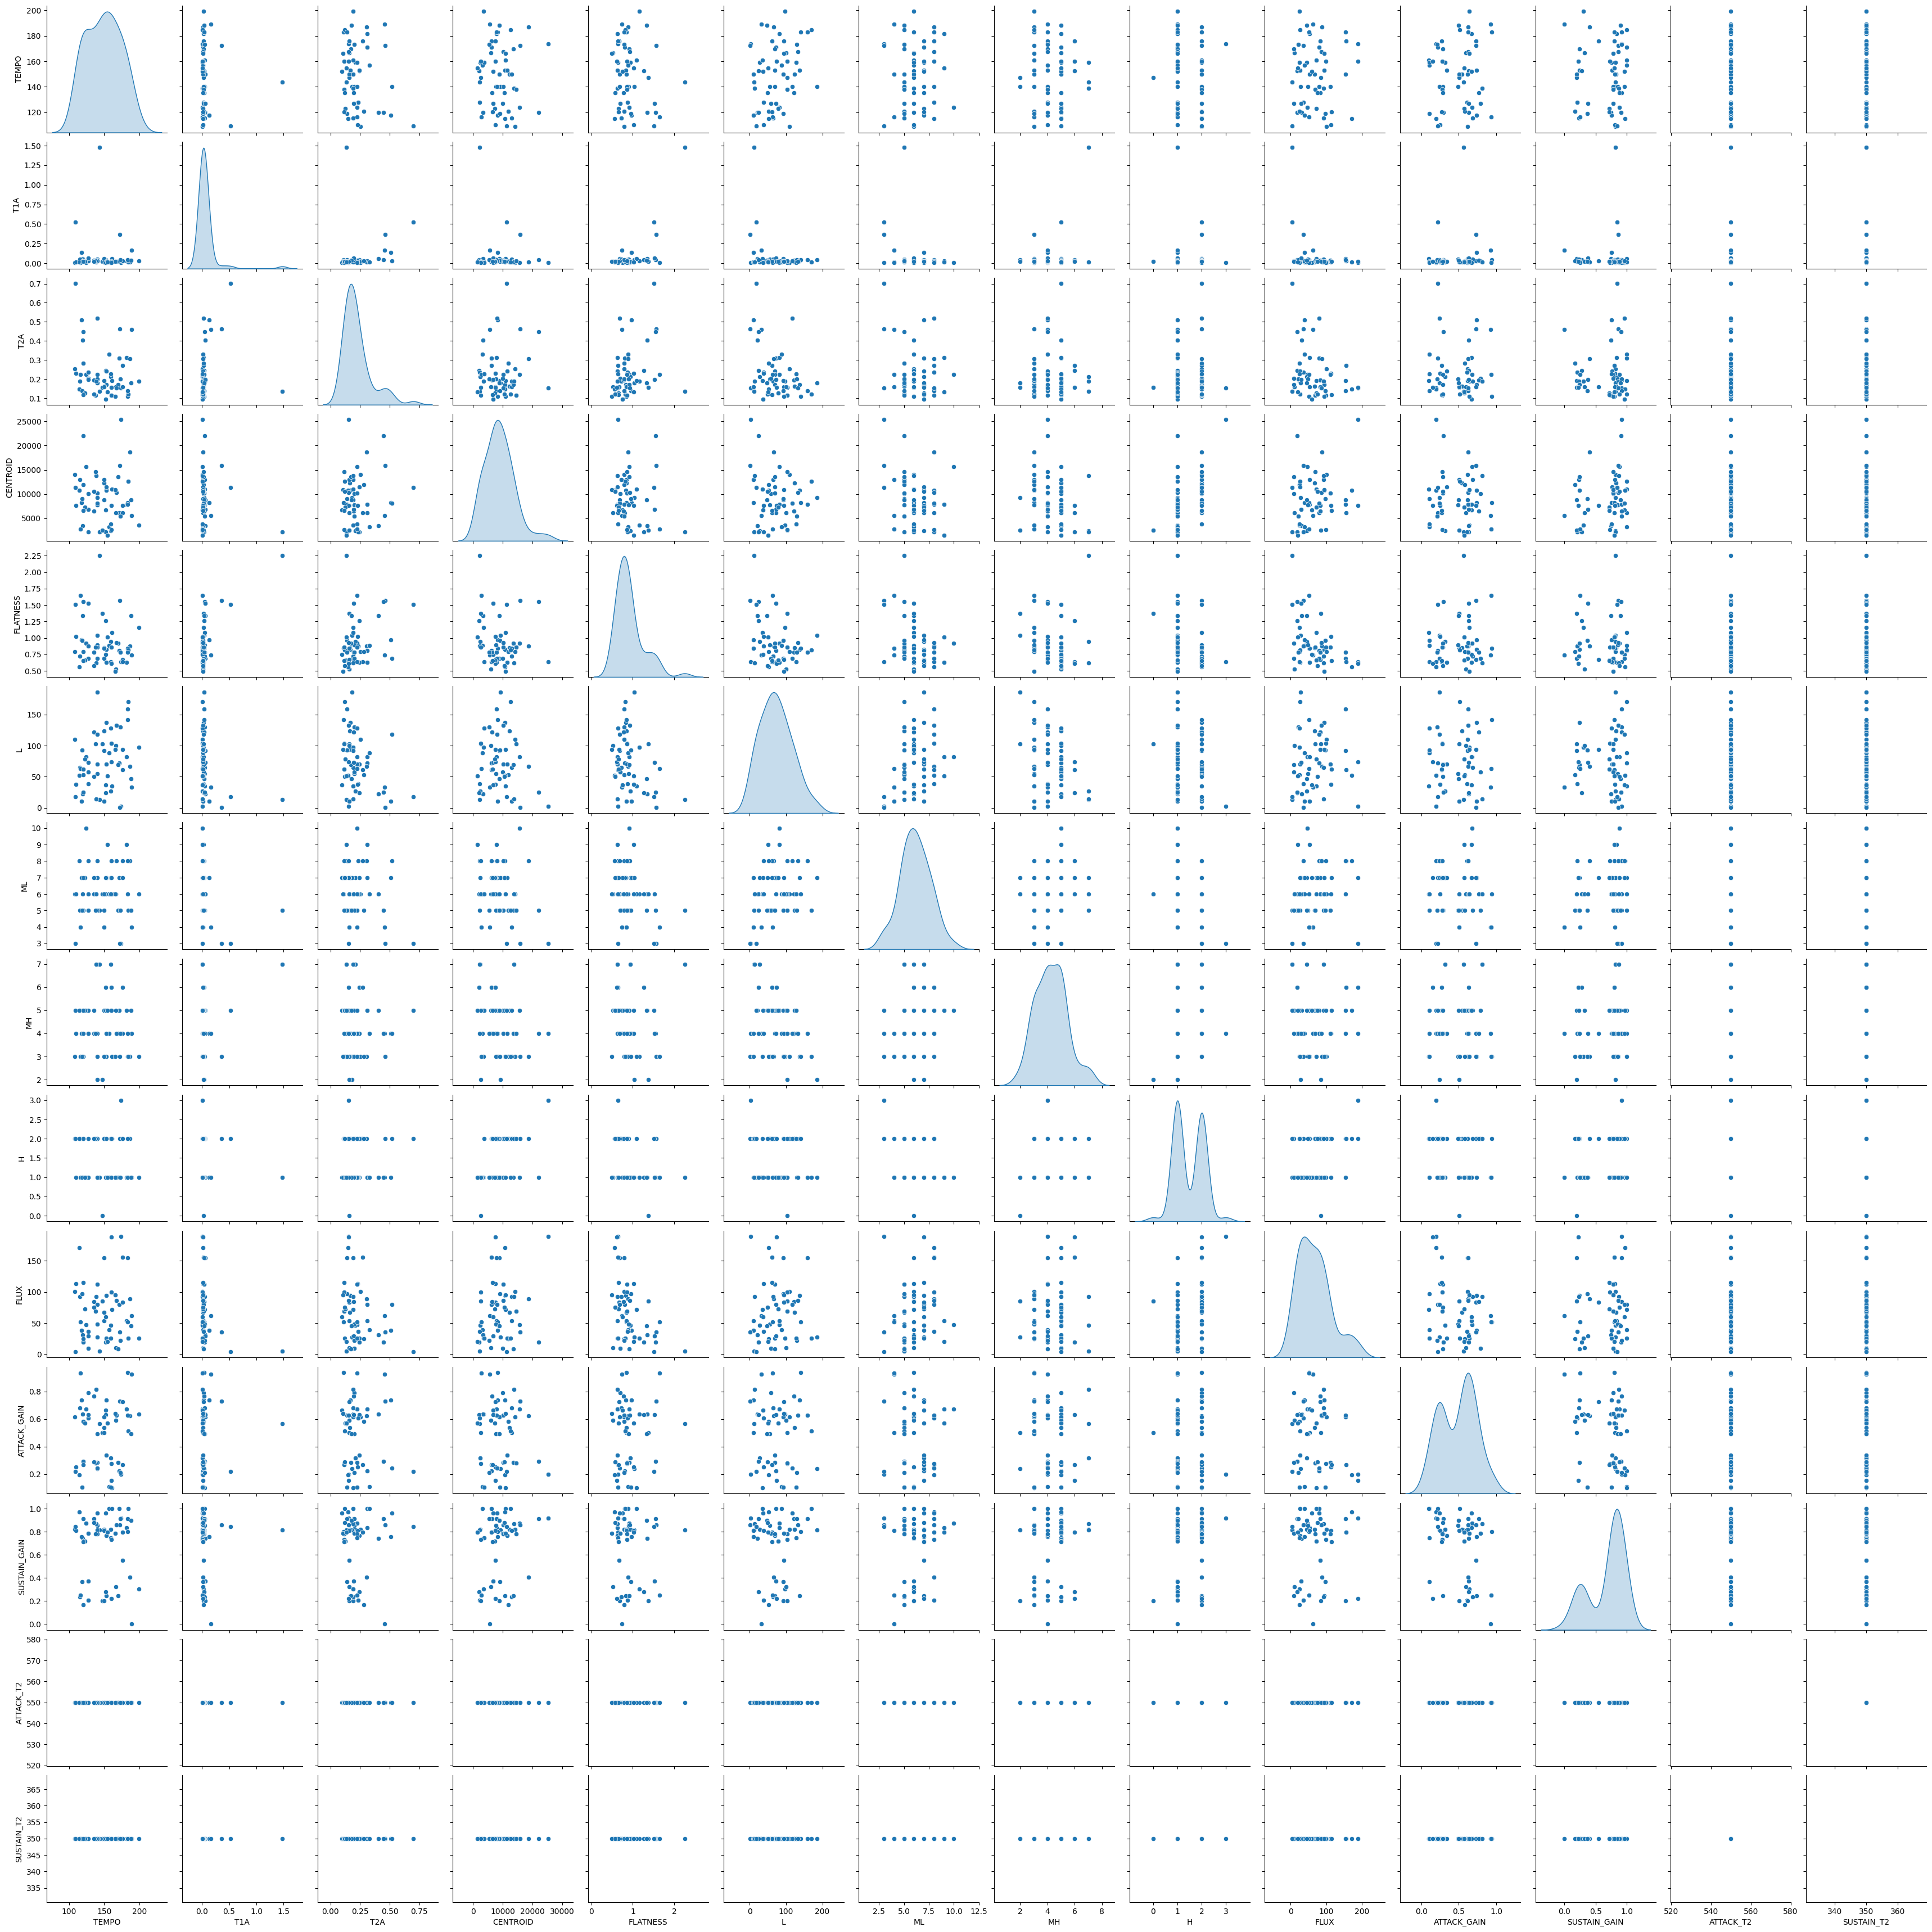

In [8]:

sns.pairplot(data=df, diag_kind='kde')